Web scraping is the process of gathering information from the Internet. Even copying and pasting the lyrics of your favorite song is a form of web scraping! However, the words “web scraping” usually refer to a process that involves automation. Some websites don’t like it when automatic scrapers gather their data, while others don’t mind.



Importing packages

Python requests is a library for making HTTP requests. It provides an easy-to-use interface that makes working with HTTP very simple, which means it simplifies the process of sending and receiving data from websites by providing a uniform interface for both GET and POST methods.

Beautiful Soup is a Python library that makes it easy to scrape information from web pages. It sits atop an HTML or XML parser and provides Pythonic idioms for iterating, searching, and modifying the parse tree.

URLS
https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html
You can deconstruct the above URL into two main parts:

The base URL represents the path to the search functionality of the website. In the example above, the base URL is https://realpython.github.io/fake-jobs/.
The specific site location that ends with .html is the path to the job description’s unique resource.
Any job posted on this website will use the same base URL. However, the unique resources’ location will be different depending on what specific job posting you’re viewing.

URLs can hold more information than just the location of a file. Some websites use query parameters to encode values that you submit when performing a search. You can think of them as query strings that you send to the database to retrieve specific records.

You’ll find query parameters at the end of a URL. For example, if you go to Indeed and search for “software developer” in “Australia” through their search bar, you’ll see that the URL changes to include these values as query parameters:

https://au.indeed.com/jobs?q=software+developer&l=Australia
The query parameters in this URL are ?q=software+developer&l=Australia. Query parameters consist of three parts:

Start: The beginning of the query parameters is denoted by a question mark (?).

Information: The pieces of information constituting one query parameter are encoded in key-value pairs, where related keys and values are joined together by an equals sign (key=value).

Separator: Every URL can have multiple query parameters, separated by an ampersand symbol (&).

Equipped with this information, you can pick apart the URL’s query parameters into two key-value pairs:

q=software+developer selects the type of job.
l=Australia selects the location of the job.


In [3]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")


In [4]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages+1):
    
    print(f"Scraping page {i}")
    
# Create URL to collect links from paginated data
    
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

# Collect HTML data from this page.
#This code issues an HTTP GET request to the given URL.
#It retrieves the HTML data that the server sends back and stores that data in a Python object.

    response = requests.get(url)
    
# Parse content
    
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")
    
    
    
    
    

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [5]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | My daughter and I were deni...
1,✅ Trip Verified | Despite boarding being the u...
2,"Not Verified | Flight cancelled, no crew! 9th..."
3,"Not Verified | The worst service ever, my bag..."
4,✅ Trip Verified | 4/4 flights we booked this ...


In [6]:
df.to_csv(r'C:\Users\DELL\Desktop\British Airways\BA_Reviews.csv')

In [7]:
df['reviews'][0]

'✅ Trip Verified |  My daughter and I were denied boarding on our business class flight from Madrid to Heathrow in March 25, 2023, the first leg on our return flight to Victoria, Canada. No reason was given for the denied boarding by the check in staff at the British Airways counter in Madrid, who said they were only agents and told us to call British Airways. We were three hours early for the flight and had valid passports. After many tries we finally reached British Airways by phone, but we were told to call Expedia which had booked the flights. Expedia confirmed that we had been bumped from the flight, with no explanation as to why. Expedia then began a long process of finding alternative flights. Over the next 24 hours we had numerous calls with both Expedia and British Airways. Incredibly, the next available flights were 9 days later on April 3. This was almost unbelievable, but after many many tries it was the best we could do. Even though these were Business Class tickets. Part 

In [8]:
ba_df = pd.read_csv('BA_Reviews.csv')


In [9]:
ba_df.shape

(1000, 2)

In [10]:
ba_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [11]:
ba_df.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | My daughter and I were deni...
1,1,✅ Trip Verified | Despite boarding being the u...
2,2,"Not Verified | Flight cancelled, no crew! 9th..."
3,3,"Not Verified | The worst service ever, my bag..."
4,4,✅ Trip Verified | 4/4 flights we booked this ...


In [19]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\dell\anaconda3\lib\site-packages\huggingface_hub-0.17.1-py3.8.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [20]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\dell\anaconda3\lib\site-packages\huggingface_hub-0.17.1-py3.8.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [21]:
!pip install spacy

  Obtaining dependency information for typing-extensions>=4.6.1 from https://files.pythonhosted.org/packages/ec/6b/63cc3df74987c36fe26157ee12e09e8f9db4de771e0f3404263117e75b95/typing_extensions-4.7.1-py3-none-any.whl.metadata
  Using cached typing_extensions-4.7.1-py3-none-any.whl.metadata (3.1 kB)
Using cached typing_extensions-4.7.1-py3-none-any.whl (33 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0


DEPRECATION: Loading egg at c:\users\dell\anaconda3\lib\site-packages\huggingface_hub-0.17.1-py3.8.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.7.1 which is incompatible.


In [22]:
pip install spacy-model-manager

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\dell\anaconda3\lib\site-packages\huggingface_hub-0.17.1-py3.8.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [23]:
!python -m spacy download en

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 653.6 kB/s eta 0:00:20
      --------------------------------------- 0.2/12.8 MB 2.5 MB/s eta 0:00:06
     - -------------------------------------- 0.4/12.8 MB 2.8 MB/s eta 0:00:05
     - -------------------------------------- 0.6/12.8 MB 3.5 MB/s eta 0:00:04
     -- ------------------------------------- 1.0/12.8 MB 4.0 MB/s eta 0:00:03
     --- ------------------------------------ 1.2/12.8 MB 4.4 MB/s eta 0:00:03
     ---- ----------------------------------- 1.5/12.8 MB 4.7 MB/s eta 0:00:03
     ----- ---------------------------------- 1.8/12.8 MB 4.9 MB/s eta 0:00:03
     ------ --------------------------------- 2.2/12.8 MB 5.1 MB/s eta 0:00:03
     ------- -------------------------------- 2.4/12.8 MB 5.5 MB/s eta 0:00:02
     -------- ------------------------------- 2.6/12.8 MB 5.2 MB/s eta 0:00:02
     --------- ------------------------------ 3.1/12.8 MB 

DEPRECATION: Loading egg at c:\users\dell\anaconda3\lib\site-packages\huggingface_hub-0.17.1-py3.8.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [12]:

import pyLDAvis # package to interpret the topics in a topic model
import pyLDAvis.gensim_models # python library for the interactive topic modeling visualization
import pickle # for html export
import spacy
import pandas as pd # for data processing
import os # for setting working directory
import re # regular expression library
from wordcloud import WordCloud # for generating word clouds
import gensim # open-source library for unsupervised topic modeling, document indexing
from gensim.utils import simple_preprocess
import nltk # python tool kit for NLP
nltk.download('stopwords')
from nltk.corpus import stopwords # for removing stop words
import gensim.corpora as corpora # for mapping words to integers
import string
string.punctuation
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


A Regular Expression (RegEx) is a sequence of characters that defines a search pattern.

In [13]:
#Converting to lower case
ba_df['reviews_processed'] = ba_df['reviews'].map(lambda x: x.lower())
print(ba_df['reviews_processed'][0][:100])

✅ trip verified |  my daughter and i were denied boarding on our business class flight from madrid t


In [14]:
#Removing trip verified and not verified as it is very common

ba_df['reviews_processed']= ba_df['reviews_processed'].str.replace('✅ trip verified |','')
ba_df['reviews_processed']= ba_df['reviews_processed'].str.replace('not verified |','')
print(ba_df['reviews_processed'][0][:100])

  my daughter and i were denied boarding on our business class flight from madrid to heathrow in mar


In [15]:
#removing punctuations

def removing_punctuations(text):
    punctuation_free= ''.join([i for i in text if i not in string.punctuation])
    return punctuation_free

ba_df['reviews_processed']= ba_df['reviews_processed'].map(lambda x: removing_punctuations(x))
print(ba_df['reviews_processed'][0][:100])

  my daughter and i were denied boarding on our business class flight from madrid to heathrow in mar


Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites

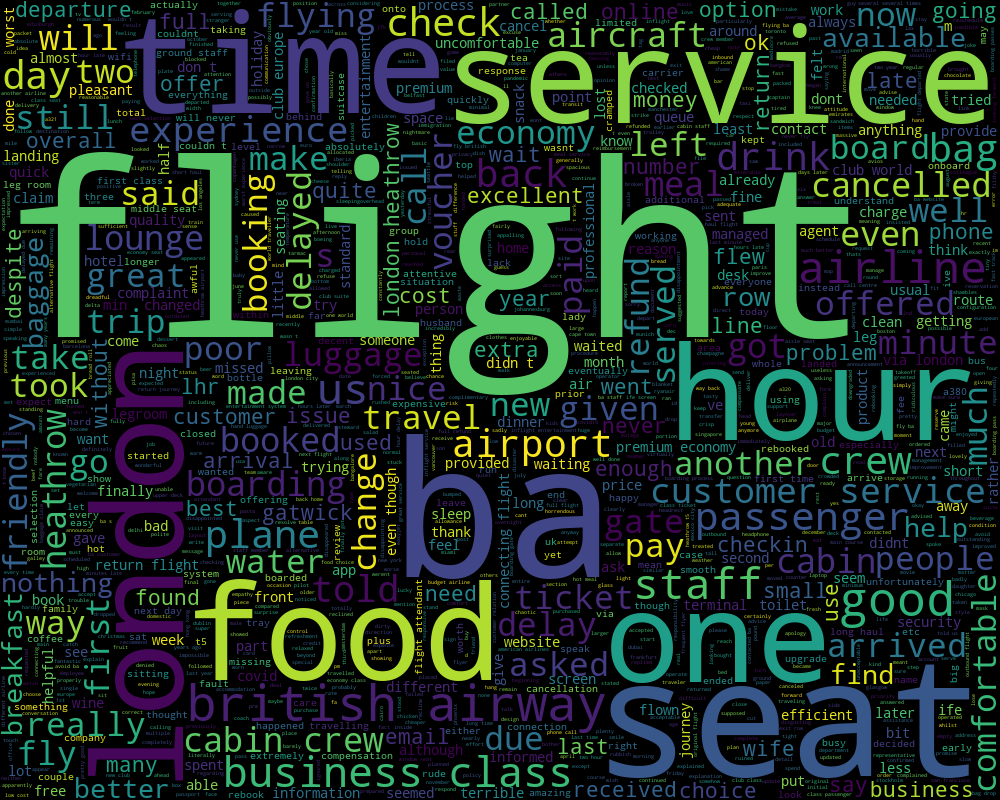

In [16]:
# Join the different processed titles together.
long_string = ','.join(list(ba_df['reviews_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="black", max_words=5000, contour_width=3, contour_color='steelblue',width=1000,height=800)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [17]:

stop_words = nltk.corpus.stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'used','using','use','model','one','two','set'])

#Function to convert sentence to words
def sent_to_words(sentence):
    for sentence in sentence:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) #deacc=true helps to remove punctuation
       
data = ba_df.reviews_processed.values.tolist() #creating list of docs
data_words= list(sent_to_words(data)) #creating list of tokens in a list of docs

#Removing stopwords
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

data_no_stop_words= list(remove_stopwords(data_words))


N-grams are continuous sequences of words or symbols, or tokens in a document. In technical terms, they can be defined as the neighboring sequences of items in a document. They come into play when we deal with text data in NLP (Natural Language Processing) tasks. They have a wide range of applications, like language models, semantic features, spelling correction, machine translation, text mining, etc.

In [18]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['my', 'daughter', 'and', 'were', 'denied', 'boarding', 'on', 'our', 'business_class', 'flight', 'from', 'madrid', 'to', 'heathrow', 'in', 'march', 'the', 'first', 'leg', 'on', 'our', 'return', 'flight', 'to', 'victoria', 'canada', 'no', 'reason', 'was', 'given', 'for', 'the', 'denied', 'boarding', 'by', 'the', 'check', 'in', 'staff', 'at', 'the', 'british_airways', 'counter', 'in', 'madrid', 'who', 'said', 'they', 'were', 'only', 'agents', 'and', 'told', 'us', 'to', 'call', 'british_airways', 'we', 'were', 'three', 'hours', 'early', 'for', 'the', 'flight', 'and', 'had', 'valid', 'passports', 'after', 'many', 'tries', 'we', 'finally', 'reached', 'british_airways', 'by', 'phone', 'but', 'we', 'were', 'told', 'to', 'call', 'expedia', 'which', 'had', 'booked', 'the', 'flights', 'expedia', 'confirmed', 'that', 'we', 'had', 'been', 'bumped', 'from', 'the', 'flight', 'with', 'no', 'explanation', 'as', 'to', 'why', 'expedia', 'then', 'began', 'long', 'process', 'of', 'finding', 'alternative',

In [19]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

spaCy comes with pretrained NLP models that can perform most common NLP tasks, such as tokenization, parts of speech (POS) tagging, named entity recognition (NER), lemmatization, transforming to word vectors etc.

But, what exactly is a Doc object ? (nlp object in this eg)

It is a sequence of tokens that contains not just the original text but all the results produced by the spaCy model after processing the text. Useful information such as the lemma of the text, whether it is a stop word or not, named entities, the word vector of the text and so on are pre-computed and readily stored in the Doc object.

In [20]:
data_words_bigrams = make_bigrams(data_no_stop_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['daughter', 'deny', 'boarding', 'business_class', 'flight', 'flight', 'reason', 'give', 'deny', 'boarding', 'check', 'staff', 'british_airway', 'counter', 'say', 'agent', 'tell', 'call', 'british_airway', 'hour', 'early', 'flight', 'valid', 'passport', 'many', 'try', 'finally', 'reach', 'british_airway', 'phone', 'tell', 'call', 'expedia', 'book', 'flight', 'expedia', 'confirm', 'bump', 'flight', 'explanation', 'expedia', 'begin', 'long', 'process', 'find', 'alternative', 'flight', 'next', 'hour', 'numerous', 'call', 'expedia', 'british_airway', 'incredibly', 'next', 'available', 'flight', 'day', 'later', 'almost', 'unbelievable', 'many', 'many', 'try', 'well', 'business_class', 'ticket', 'part', 'problem', 'apparently', 'rule', 'allow', 'change', 'route', 'segment', 'flight', 'day', 'delay', 'major', 'problem', 'miss', 'daughter', 'miss', 'school', 'receive', 'compensation', 'british_airway', 'penalty', 'fee', 'reimbursement', 'expense', 'stay', 'extra', 'day', 'return', 'begin', 'o

In [21]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 2), (11, 1), (12, 7), (13, 1), (14, 2), (15, 3), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 3), (27, 1), (28, 1), (29, 1), (30, 2), (31, 1), (32, 1), (33, 2), (34, 4), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 9), (44, 1), (45, 1), (46, 1), (47, 1), (48, 2), (49, 1), (50, 2), (51, 1), (52, 1), (53, 1), (54, 4), (55, 2), (56, 1), (57, 2), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 2), (69, 2), (70, 1), (71, 1), (72, 1), (73, 4), (74, 1), (75, 1), (76, 2), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 2), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 2), (92, 1), (93, 1), (94, 1), (95, 1), (96, 2), (97, 1), (98, 1), (99, 1), (100, 1)]]


In [22]:
from pprint import pprint
# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.029*"flight" + 0.017*"seat" + 0.013*"crew" + 0.013*"service" + '
  '0.010*"cabin" + 0.009*"get" + 0.009*"good" + 0.008*"staff" + 0.008*"time" + '
  '0.007*"drink"'),
 (1,
  '0.028*"flight" + 0.023*"seat" + 0.011*"service" + 0.009*"time" + '
  '0.008*"fly" + 0.007*"british_airway" + 0.007*"food" + 0.007*"get" + '
  '0.007*"ask" + 0.007*"airline"'),
 (2,
  '0.016*"seat" + 0.016*"service" + 0.015*"flight" + 0.012*"good" + '
  '0.009*"food" + 0.008*"hour" + 0.007*"lounge" + 0.006*"get" + '
  '0.006*"customer" + 0.006*"time"'),
 (3,
  '0.027*"flight" + 0.020*"seat" + 0.014*"service" + 0.012*"get" + '
  '0.011*"hour" + 0.010*"fly" + 0.007*"crew" + 0.007*"staff" + 0.007*"offer" + '
  '0.007*"meal"'),
 (4,
  '0.029*"flight" + 0.013*"hour" + 0.011*"go" + 0.011*"service" + '
  '0.010*"experience" + 0.009*"delay" + 0.008*"airline" + 0.008*"fly" + '
  '0.007*"customer" + 0.007*"get"'),
 (5,
  '0.022*"flight" + 0.014*"seat" + 0.013*"service" + 0.013*"fly" + '
  '0.010*"time" + 0.009*"cabi

In [24]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.012093 -0.006288       1        1  27.382942
7      0.025444 -0.015654       2        1  17.766768
3     -0.007168 -0.001311       3        1  10.866212
5     -0.027275 -0.002450       4        1   8.675804
0     -0.033597 -0.009228       5        1   8.534511
1      0.002295 -0.004141       6        1   8.323625
9      0.012374 -0.016280       7        1   7.279354
6      0.027865 -0.016272       8        1   4.442029
4      0.041719  0.038128       9        1   3.534898
2     -0.029564  0.033496      10        1   3.193856, topic_info=        Term         Freq        Total Category  logprob  loglift
43    flight  2006.000000  2006.000000  Default  30.0000  30.0000
255     seat   880.000000   880.000000  Default  29.0000  29.0000
84   service   659.000000   659.000000  Default  28.0000  28.0000
48      hour   512.000000   512.000000  Default  27.0000  27.0000
123     good   450.000000   450.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
104       ba     7.476940   257.356967  Topic10  -5.5618  -0.0947
245    cabin     8.271339   353.005806  Topic10  -5.4608  -0.3097
86     staff     8.335228   376.364007  Topic10  -5.4531  -0.3661
112     crew     7.791528   420.884363  Topic10  -5.5206  -0.5454
458    offer     6.954923   259.322612  Topic10  -5.6341  -0.1747

[814 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
4418      2  0.423220    abroad
4418      5  0.423220    abroad
1608      1  0.158241  absolute
1608      2  0.158241  absolute
1608      3  0.079120  absolute
...     ...       ...       ...
892       7  0.080851      year
892       8  0.056596      year
892       9  0.024255      year
892      10  0.016170      year
1914      8  0.635943       zum

[2120 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 8, 4, 6, 1, 2, 10, 7, 5, 3])

Topic coherence is a way to judge the quality of topics via a single quantitative, scalar value. There are many ways to compute the coherence score. For the u_mass and c_v options, a higher is always better. Note that u_mass is between -14 and 14 and c_v is between 0 and 1.

-14 <= u_mass <= 14

0 <= c_v <= 1

The coherence score is an aggregation of the following.

segmentation

probability estimation

confirmation measure

In [25]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.520708262749195

Coherence Score:  0.3288760037096067


In [47]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
   

 pd.DataFrame(model_results).to_csv('./results/lda_tuning_results.csv', index=False)
    pbar.close()


  2%|▏         | 9/540 [02:46<2:43:30, 18.48s/it]

 54%|█████▍    | 294/540 [1:25:12<1:21:44, 19.94s/it]


100%|██████████| 540/540 [2:39:04<00:00, 15.95s/it]

OSError: Cannot save file into a non-existent directory: 'results'

In [68]:
result_df=pd.DataFrame(model_results)
result_df.head()


,Validation_Set,Topics,Alpha,Beta,Coherence
0,75% Corpus,2,0.01,0.01,0.367642
1,75% Corpus,2,0.01,0.31,0.362315
2,75% Corpus,2,0.01,0.61,0.390831
3,75% Corpus,2,0.01,0.91,0.404687
4,75% Corpus,2,0.01,symmetric,0.385432


In [72]:
max_coherence_index= result_df['Coherence'].idxmax()
print(max_coherence_index)


208


In [75]:
result_df.loc[max_coherence_index]

Validation_Set    75% Corpus
Topics                     8
Alpha             asymmetric
Beta                    0.91
Coherence           0.619595
Name: 208, dtype: object

In [26]:
#Optimum parameters

from pprint import pprint
# number of topics
num_topics = 8

# Build optimum LDA model
lda_optimum_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                        random_state=100,
                                        chunksize=100,
                                         passes=10,
                                         alpha=0.01,
                                         eta=0.91)

# Print the Keyword in the 10 topics
pprint(lda_optimum_model.print_topics())
doc_lda = lda_optimum_model[corpus]

[(0,
  '0.001*"consumer" + 0.000*"stirrer" + 0.000*"spoon" + 0.000*"sugar" + '
  '0.000*"ale" + 0.000*"female" + 0.000*"heineken" + 0.000*"incapacity" + '
  '0.000*"inability" + 0.000*"fulfil"'),
 (1,
  '0.001*"stuff" + 0.001*"seal" + 0.001*"wrap" + 0.001*"sodium" + '
  '0.001*"prosciutto" + 0.001*"perspective" + 0.001*"pizza" + '
  '0.001*"redundant" + 0.001*"unremarkable" + 0.001*"wish"'),
 (2,
  '0.001*"airmile" + 0.001*"mindset" + 0.001*"accra" + 0.001*"impressed" + '
  '0.001*"warn" + 0.001*"leadership" + 0.001*"dutyfree" + 0.001*"illustrate" + '
  '0.001*"detract" + 0.001*"singleuse"'),
 (3,
  '0.001*"parent" + 0.001*"oneworld" + 0.001*"pram" + 0.001*"baby" + '
  '0.001*"stress" + 0.001*"recognise" + 0.001*"lanyard" + 0.001*"exchange" + '
  '0.001*"print" + 0.001*"airhostesse"'),
 (4,
  '0.001*"wish" + 0.001*"und" + 0.001*"medicine" + 0.001*"stomach" + '
  '0.001*"caress" + 0.001*"grateful" + 0.001*"sick" + 0.001*"forever" + '
  '0.001*"wir" + 0.001*"war"'),
 (5,
  '0.000*"enhanc

In [27]:

pyLDAvis.enable_notebook()
vis_optimum = pyLDAvis.gensim.prepare(lda_optimum_model, corpus, id2word)
vis_optimum

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.176806  0.074844       1        1  56.832357
6     -0.172721 -0.076206       2        1  42.102149
1      0.057990  0.007736       3        1   0.482336
3      0.057897 -0.001621       4        1   0.220931
2      0.056854  0.001827       5        1   0.112876
4      0.059486 -0.002687       6        1   0.101845
0      0.057988 -0.002008       7        1   0.087921
5      0.059313 -0.001885       8        1   0.059585, topic_info=              Term        Freq       Total Category  logprob  loglift
245          cabin  354.000000  354.000000  Default  30.0000  30.0000
117           food  401.000000  401.000000  Default  29.0000  29.0000
112           crew  416.000000  416.000000  Default  28.0000  28.0000
255           seat  895.000000  895.000000  Default  27.0000  27.0000
142         cancel  202.000000  202.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
2061     skybridge    0.007835    2.389560   Topic8  -8.4412   1.7052
140     thankfully    0.010163    7.699909   Topic8  -8.1810   0.7953
548         pastry    0.009788    6.822451   Topic8  -8.2186   0.8787
566   conversation    0.010296   10.490823   Topic8  -8.1680   0.4990
1695        ensure    0.010032   13.392547   Topic8  -8.1940   0.2288

[440 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
4285      1  0.519521     abreakfast
4285      2  0.519521     abreakfast
914       1  0.190152         accept
914       2  0.823992         accept
165       1  0.067620  accommodation
...     ...       ...            ...
3569      2  0.556887        yesaske
3121      1  0.542590         yrsold
3121      2  0.542590         yrsold
1914      1  0.563265            zum
1914      2  0.563265            zum

[764 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 7, 2, 4, 3, 5, 1, 6])

SENTIMENT ANALYSIS


In [28]:

ba_dfcopy= (ba_df['reviews_processed'].copy()).to_frame()
ba_dfcopy['index']=ba_dfcopy.index


In [29]:
ba_dfcopy.head()


,reviews_processed,index
0,my daughter and i were denied boarding on ou...,0
1,despite boarding being the usual free for all...,1
2,flight cancelled no crew 9th september 2023 ...,2
3,the worst service ever my baggage did not ar...,3
4,44 flights we booked this holiday were delay...,4


In [30]:
import nltk
nltk.download('vader_lexicon') #using VADER for sentiment analysis
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm #For seeing terminal progress bars

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [31]:
# Vader object created
review_sentiments= SentimentIntensityAnalyzer()

In [32]:
#Need to run on entire dataset
results={} #creating dict for storing neg,neu,pos,compound values

for i,row in tqdm(ba_dfcopy.iterrows(),total=len(ba_dfcopy)):
    text= row['reviews_processed']
    idx = row['index']
    
    results[idx]= review_sentiments.polarity_scores(text)
    
    

  0%|          | 0/1000 [00:00<?, ?it/s]

In [33]:
vaders =pd.DataFrame(results).T
vaders = vaders.reset_index().rename(columns={'index': 'index'})
#vaders=vaders.merge(ba_dfcopy,how='left')


ba_df_score= pd.concat([ba_dfcopy,vaders],axis=1)

In [34]:
ba_df_score


,reviews_processed,index,index,neg,neu,pos,compound
0,my daughter and i were denied boarding on ou...,0,0,0.142,0.811,0.046,-0.9877
1,despite boarding being the usual free for all...,1,1,0.013,0.803,0.184,0.9524
2,flight cancelled no crew 9th september 2023 ...,2,2,0.306,0.694,0.000,-0.9479
3,the worst service ever my baggage did not ar...,3,3,0.268,0.732,0.000,-0.8591
4,44 flights we booked this holiday were delay...,4,4,0.198,0.702,0.100,-0.2698
...,...,...,...,...,...,...,...
995,london to lyon the flight has 1h 30 delay fo...,995,995,0.287,0.713,0.000,-0.9623
996,london to boston i was seated next to a cust...,996,996,0.000,0.674,0.326,0.9268
997,stockholm to london standard configuration on...,997,997,0.000,0.784,0.216,0.9559
998,amsterdam to london arrived 33 minutes late ...,998,998,0.097,0.737,0.166,0.7964


In [35]:
ba_df_score.drop(['index','neg','pos','neu'],axis=1,inplace=True)

In [36]:
ba_df_score.rename(columns={'compound':'compound_score'},inplace=True)

In [37]:
ba_df_score

,reviews_processed,compound_score
0,my daughter and i were denied boarding on ou...,-0.9877
1,despite boarding being the usual free for all...,0.9524
2,flight cancelled no crew 9th september 2023 ...,-0.9479
3,the worst service ever my baggage did not ar...,-0.8591
4,44 flights we booked this holiday were delay...,-0.2698
...,...,...
995,london to lyon the flight has 1h 30 delay fo...,-0.9623
996,london to boston i was seated next to a cust...,0.9268
997,stockholm to london standard configuration on...,0.9559
998,amsterdam to london arrived 33 minutes late ...,0.7964


In [38]:
ba_df_score.loc[ba_df_score['compound_score']>0,'sentiments']='positive'
ba_df_score.loc[ba_df_score['compound_score']<0,'sentiments']='negative'
ba_df_score.loc[ba_df_score['compound_score']==0,'sentiments']='neutral'


In [39]:
ba_df_score['sentiments'].value_counts()

sentiments
positive    503
negative    491
neutral       6
Name: count, dtype: int64

Visualization


In [40]:
import matplotlib as plt
import seaborn as sn
%matplotlib inline

In [41]:
s= pd.value_counts(ba_df_score['sentiments']).reset_index()

Text(0, 0.5, 'Counts')

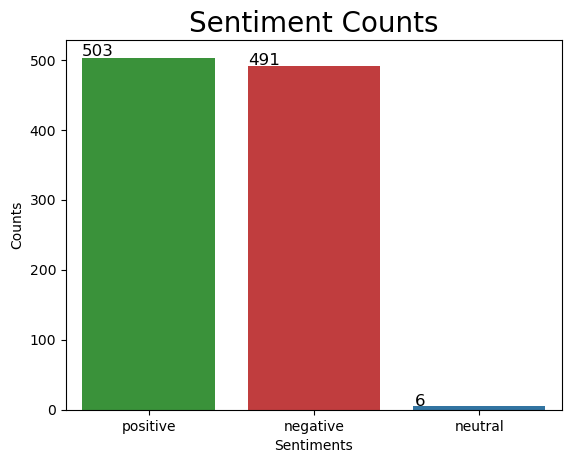

In [42]:
ax=sn.barplot(x='sentiments',y='count', data=s,palette = ['tab:green', 'tab:red', 'tab:blue'])
for p in ax.patches:
   ax.annotate("{:,}".format(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize = 12)
ax.set_title('Sentiment Counts', fontsize = 20)
ax.set_xlabel('Sentiments')
ax.set_ylabel('Counts')



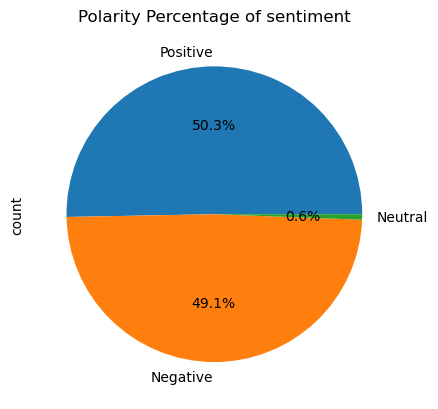

In [54]:
labels=['Positive','Negative','Neutral']
pie_chart= s.plot.pie(y='count',labels=labels,autopct='%1.1f%%',legend=False,title='Polarity Percentage of sentiment')

In [63]:

df_negative=ba_df_score[ba_df_score['sentiments'].str.contains("negative")]
df_positive=ba_df_score[ba_df_score['sentiments'].str.contains("positive")]

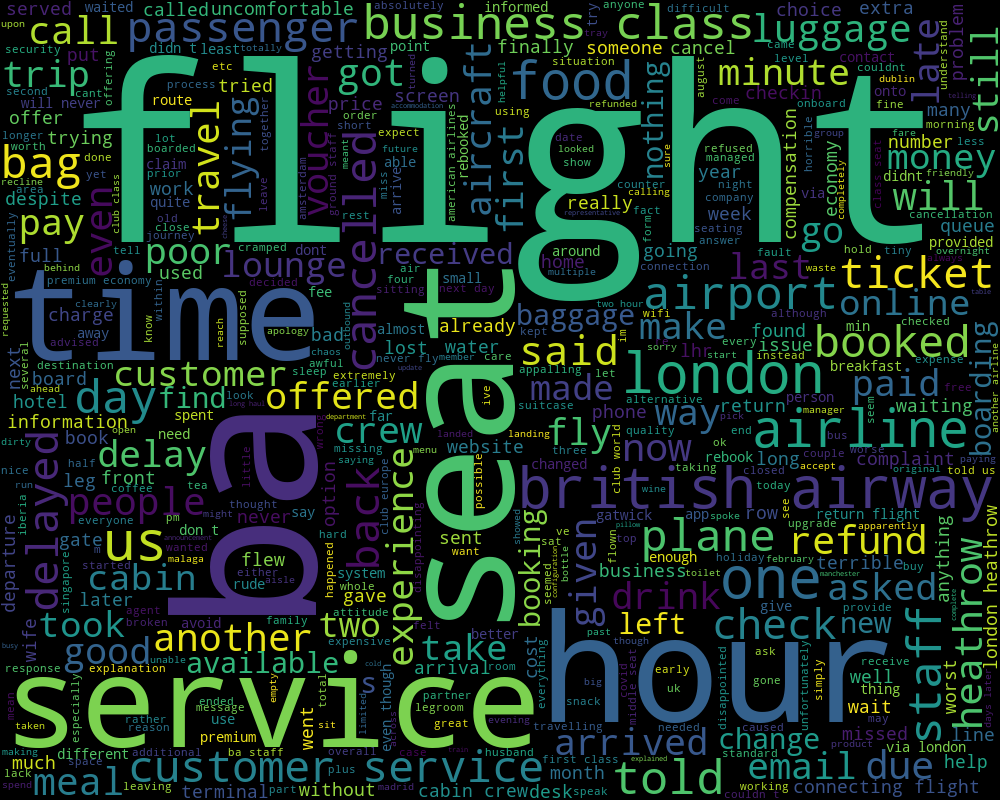

In [73]:
#Word Cloud for negative sentiments

text = " ".join(reviews for reviews in df_negative['reviews_processed'])
wordcloud_neg = WordCloud(background_color="black", max_words=500, contour_width=3, contour_color='steelblue',width=1000,height=800)

# Generate a word cloud
wordcloud_neg.generate(text)

# Visualize the word cloud
wordcloud_neg.to_image()

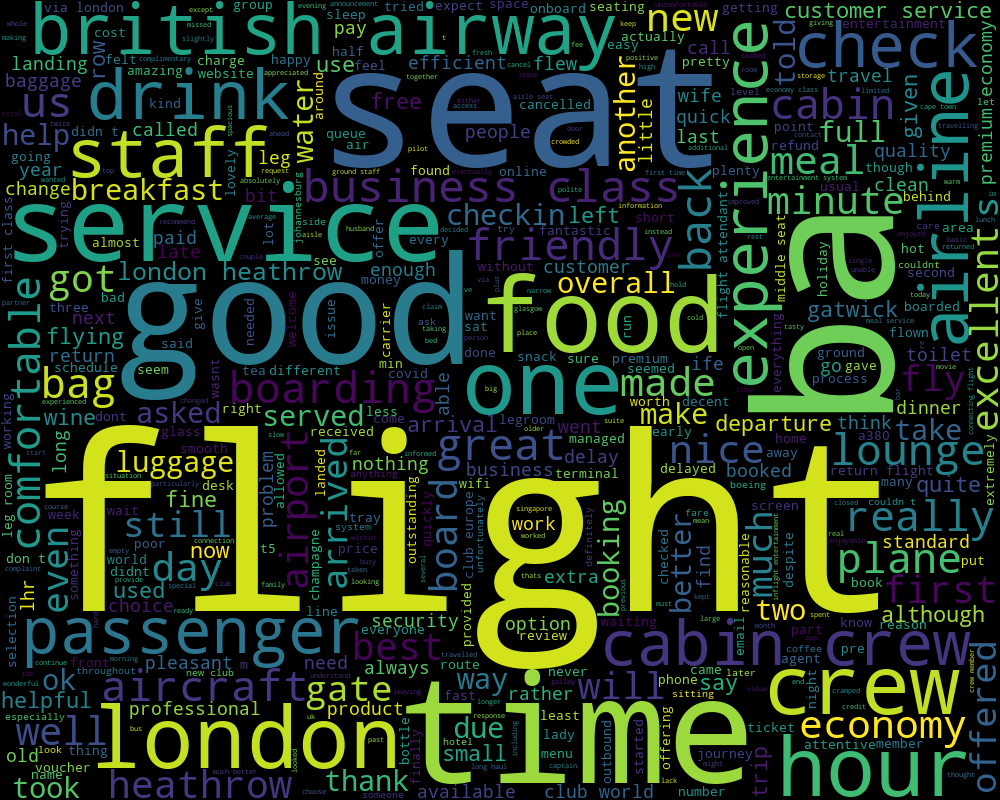

In [74]:
#Word Cloud for Positive sentiments

text = " ".join(reviews for reviews in df_positive['reviews_processed'])
wordcloud_pos = WordCloud(background_color="black", max_words=500, contour_width=3, contour_color='steelblue',width=1000,height=800)

# Generate a word cloud
wordcloud_pos.generate(text)

# Visualize the word cloud
wordcloud_pos.to_image()